# ¿Qué pasa si aplicamos muchas veces la misma transformación lineal?

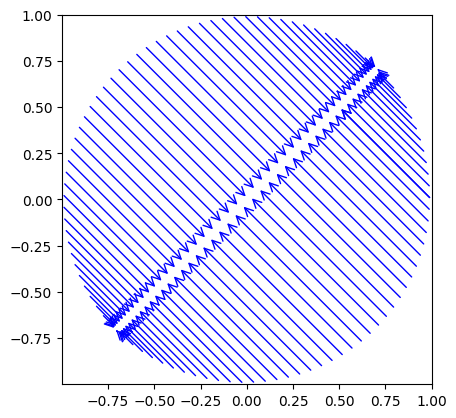

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
# Primera matriz:

A = 1/2*np.array([[1,1],[1,1]])

# ¿Qué hace sobre un vector v?
v = np.array([[np.cos(tita),np.sin(tita)] for tita in np.linspace(0,2*np.pi,100)]).T


def grafica_flechas(v0,v1,ax=None,c='blue'):
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlim(min(v0.min(),v1.min()), max(v0.max(),v1.max()))
    ax.set_ylim(min(v0.min(),v1.min()), max(v0.max(),v1.max()))

    for i in range(v.shape[1]):
        arrow = FancyArrowPatch(v0[i], v1[i],
                        arrowstyle='->',   # estilo con punta
                        mutation_scale=15, # tamaño de la punta
                        color=c)
        ax.add_patch(arrow)
    ax.set_aspect('equal')   # <<< escala igual en x e y
grafica_flechas(v.T,(A@v).T)


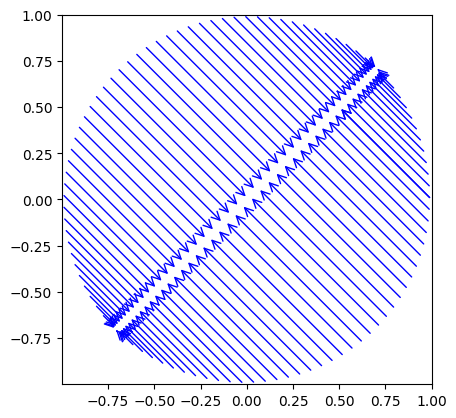

In [4]:
# Si aplicamos A 2 veces

grafica_flechas(v.T,(A@A@v).T)


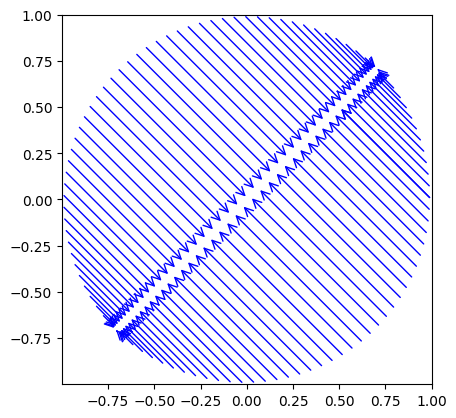

In [5]:
# Si aplicamos A 10 veces

grafica_flechas(v.T,(np.linalg.matrix_power(A,10)@v).T)


In [6]:
# ¿Por qué pasa esto?
np.linalg.eig(A)
## A tiene un autovector en el nucleo
## El otro tiene autovalor 1

EigResult(eigenvalues=array([1.00000000e+00, 1.11022302e-16]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

In [7]:
# Otra matriz, mismo S
S = np.array([[1,1],[1,-1]])/np.sqrt(2)
D = np.diag([1.5,0])
A = S@D@S.T
A

array([[0.75, 0.75],
       [0.75, 0.75]])

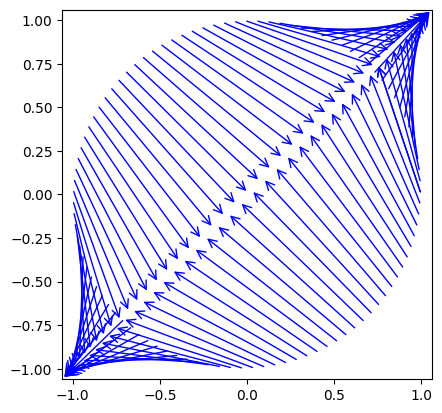

In [8]:
# Si aplicamos A 
grafica_flechas(v.T,(A@v).T)


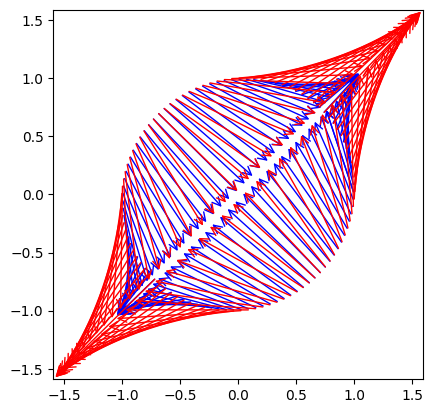

In [9]:
# Si aplicamos A 2 veces
fig, ax = plt.subplots()
grafica_flechas(v.T,(A@v).T,ax=ax,c='blue')
grafica_flechas(v.T,(np.linalg.matrix_power(A,2)@v).T,ax=ax,c='red')


In [10]:
# Otra matriz, mismo S
S = np.array([[1,1],[1,-1]])/np.sqrt(2)
D = np.diag([1,0.5])
A = S@D@S.T
A

array([[0.75, 0.25],
       [0.25, 0.75]])

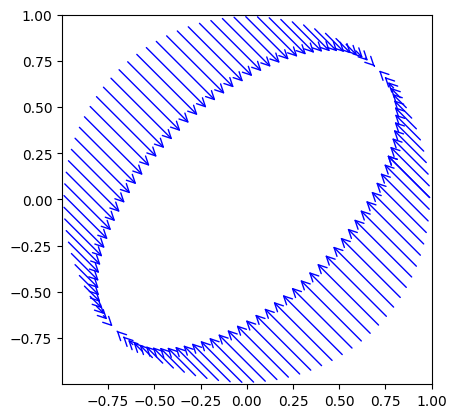

In [11]:
# Si aplicamos A 
grafica_flechas(v.T,(A@v).T)


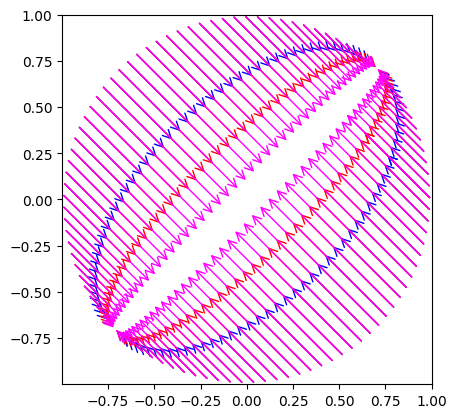

In [12]:
# Si aplicamos A 2 veces
fig, ax = plt.subplots()
grafica_flechas(v.T,(A@v).T,ax=ax,c='blue')
grafica_flechas(v.T,(np.linalg.matrix_power(A,2)@v).T,ax=ax,c='red')
grafica_flechas(v.T,(np.linalg.matrix_power(A,4)@v).T,ax=ax,c='magenta')


In [13]:
# ¿A qué se acerca la transformación A^n?
np.linalg.matrix_power(A,100)

array([[0.5, 0.5],
       [0.5, 0.5]])

In [14]:
# Tomando el (1,0) como partida, veamos como cambia la norma y el ángulo

v = np.array([1,0])

S = np.array([[1,1],[1,-1]])/np.sqrt(2)

D0 = np.diag([1,0])
A0 = S@D0@S.T

D1 = np.diag([1.5,0])
A1 = S@D1@S.T

D2 = np.diag([1,0.5])
A2 = S@D2@S.T

D3 = np.diag([1.5,0.5])
A3 = S@D3@S.T

def evolucion_angulo_y_norma(A,v,Niter=5):
    v0 = [v]
    for i in range(Niter):
        v0.append(A@v0[-1])
    theta0 = []
    norma = []
    for v in v0:
        theta0.append( np.arctan2(v[0], v[1])  )
        norma.append( np.sqrt(v[0]**2 + v[1]**2) )
    return v0,norma,theta0


_,norma0,theta0 = evolucion_angulo_y_norma(A0,v)
_,norma1,theta1 = evolucion_angulo_y_norma(A1,v)
_,norma2,theta2 = evolucion_angulo_y_norma(A2,v)
_,norma3,theta3 = evolucion_angulo_y_norma(A3,v)

Text(0, 0.5, 'Norma')

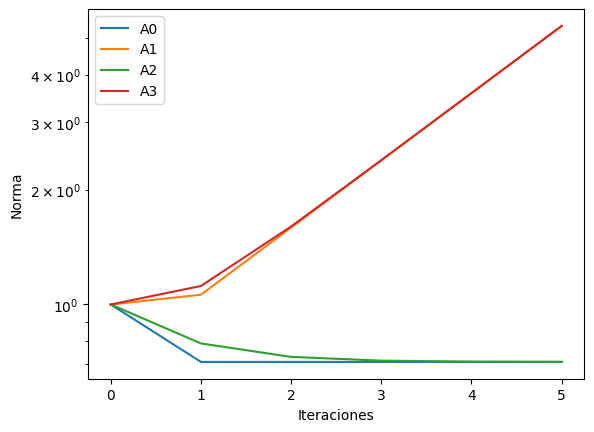

In [15]:
plt.plot(norma0,label='A0')
plt.plot(norma1,label='A1')
plt.plot(norma2,label='A2')
plt.plot(norma3,label='A3')
plt.yscale('log')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Norma')

Text(0, 0.5, 'Angulo con la horizontal [rad]')

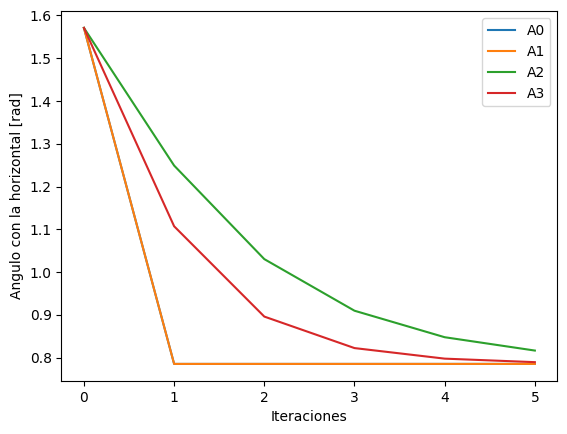

In [16]:
plt.plot(theta0,label='A0')
plt.plot(theta1,label='A1')
plt.plot(theta2,label='A2')
plt.plot(theta3,label='A3')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')

In [17]:
# ¿Pasa siempre esto?

D4 = np.diag([1.5,1.25])
A4 = S@D4@S.T
Niter = 10
_,norma1,theta1 = evolucion_angulo_y_norma(A1,v,Niter)
_,norma3,theta3 = evolucion_angulo_y_norma(A3,v,Niter)
_,norma4,theta4 = evolucion_angulo_y_norma(A4,v,Niter)


Text(0, 0.5, 'Norma')

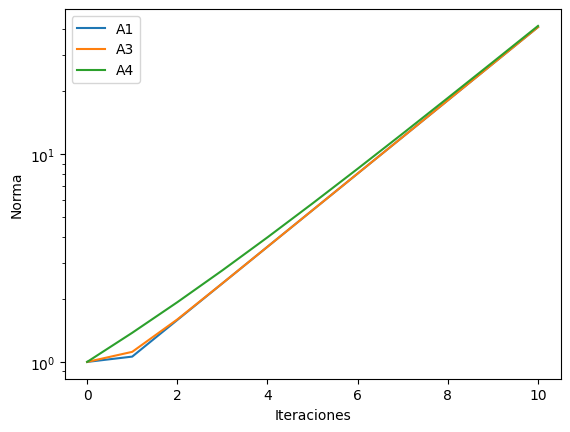

In [18]:
plt.plot(norma1,label='A1')
plt.plot(norma3,label='A3')
plt.plot(norma4,label='A4')
plt.yscale('log')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Norma')



Text(0, 0.5, 'Angulo con la horizontal [rad]')

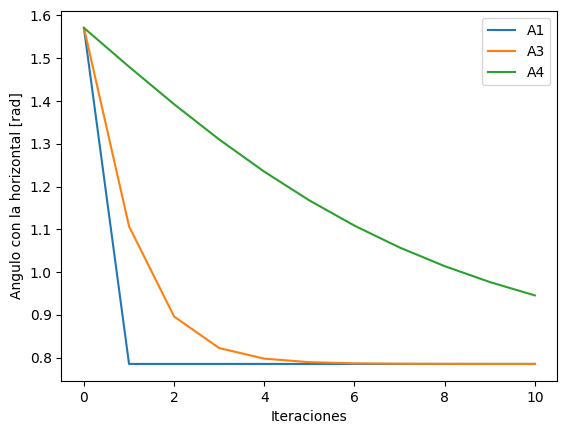

In [19]:

plt.plot(theta1,label='A1')
plt.plot(theta3,label='A3')
plt.plot(theta4,label='A4')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')

In [20]:
# ¿Pasa siempre esto?

D5 = np.diag([-1.5,1.25])
A5 = S@D5@S.T
Niter = 10
_,norma1,theta1 = evolucion_angulo_y_norma(A1,v,Niter)
_,norma3,theta3 = evolucion_angulo_y_norma(A3,v,Niter)
_,norma4,theta4 = evolucion_angulo_y_norma(A4,v,Niter)
_,norma5,theta5 = evolucion_angulo_y_norma(A5,v,Niter)


Text(0, 0.5, 'Norma')

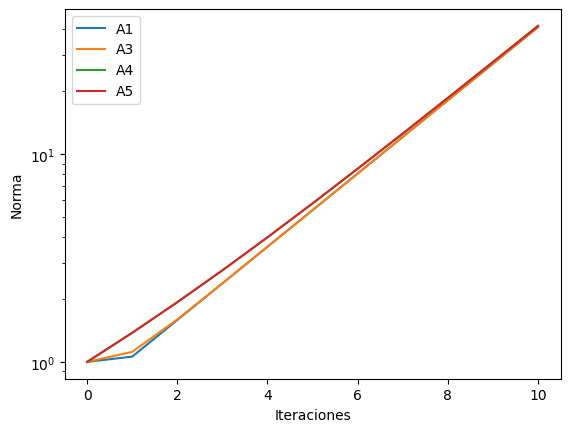

In [21]:
plt.plot(norma1,label='A1')
plt.plot(norma3,label='A3')
plt.plot(norma4,label='A4')
plt.plot(norma5,label='A5')
plt.yscale('log')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Norma')

Text(0, 0.5, 'Angulo con la horizontal [rad]')

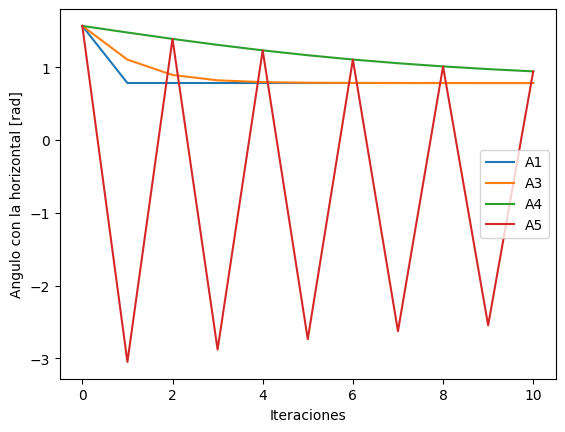

In [22]:

plt.plot(theta1,label='A1')
plt.plot(theta3,label='A3')
plt.plot(theta4,label='A4')
plt.plot(theta5,label='A5')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')

In [23]:
# ¿Pasa siempre esto?

D6 = np.diag([1.5,1.5])
A6 = S@D6@S.T
D7 = np.diag([1.5,-1.5])
A7 = S@D7@S.T
Niter = 10
_,norma1,theta1 = evolucion_angulo_y_norma(A1,v,Niter)
_,norma3,theta3 = evolucion_angulo_y_norma(A3,v,Niter)
_,norma4,theta4 = evolucion_angulo_y_norma(A4,v,Niter)
_,norma5,theta5 = evolucion_angulo_y_norma(A5,v,Niter)
_,norma6,theta6 = evolucion_angulo_y_norma(A6,v,Niter)
_,norma7,theta7 = evolucion_angulo_y_norma(A7,v,Niter)


Text(0, 0.5, 'Norma')

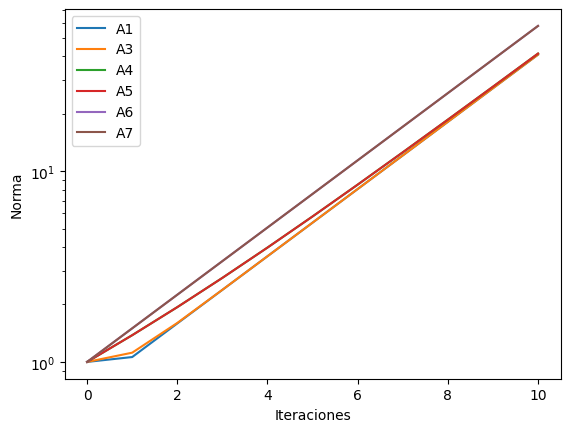

In [24]:
plt.plot(norma1,label='A1')
plt.plot(norma3,label='A3')
plt.plot(norma4,label='A4')
plt.plot(norma5,label='A5')
plt.plot(norma6,label='A6')
plt.plot(norma7,label='A7')
plt.yscale('log')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Norma')

Text(0, 0.5, 'Angulo con la horizontal [rad]')

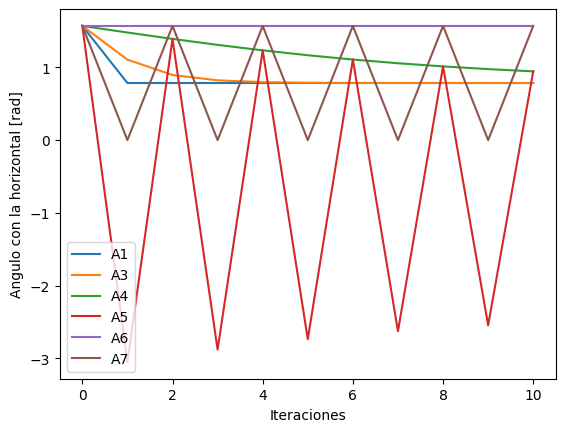

In [25]:
plt.plot(theta1,label='A1')
plt.plot(theta3,label='A3')
plt.plot(theta4,label='A4')
plt.plot(theta5,label='A5')
plt.plot(theta6,label='A6')
plt.plot(theta7,label='A7')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')

In [26]:
# Otros ejemplos:
# Rotacion
tita = np.pi/20
A8 = np.array([[np.cos(tita),-np.sin(tita)],[np.sin(tita),np.cos(tita)]])
Niter = 100
_,norma8,theta8 = evolucion_angulo_y_norma(A8,v,Niter)


Text(0, 0.5, 'Norma')

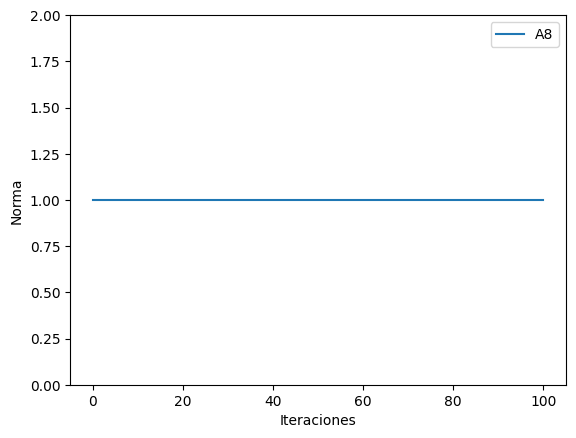

In [27]:
plt.plot(norma8,label='A8')
plt.legend()
plt.ylim(0,2)
plt.xlabel('Iteraciones')
plt.ylabel('Norma')

Text(0, 0.5, 'Angulo con la horizontal [rad]')

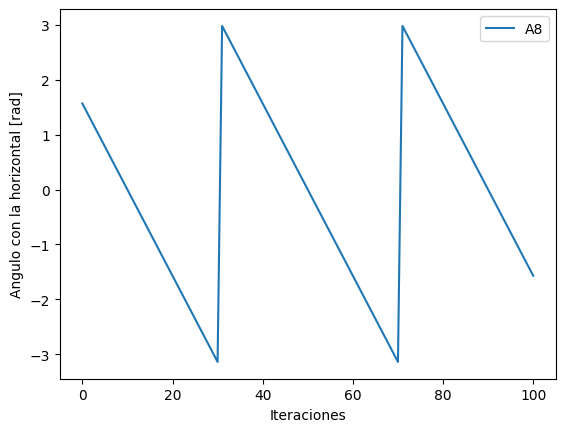

In [28]:
plt.plot(theta8,label='A8')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')


In [30]:
# Otros ejemplos:
# No diagonalizable
vA = np.array([1,0])
vB = np.array([0,1])
A9 = np.array([[1,1],[0,1]])
Niter = 5
_,norma9A,theta9A = evolucion_angulo_y_norma(A9,vA,Niter)
_,norma9B,theta9B = evolucion_angulo_y_norma(A9,vB,Niter)


Text(0, 0.5, 'Norma')

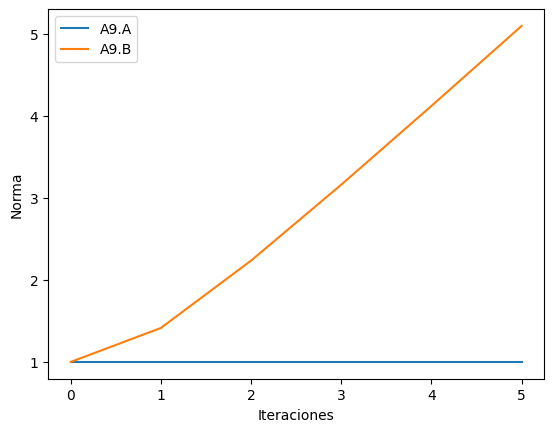

In [31]:
plt.plot(norma9A,label='A9.A')
plt.plot(norma9B,label='A9.B')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Norma')

Text(0, 0.5, 'Angulo con la horizontal [rad]')

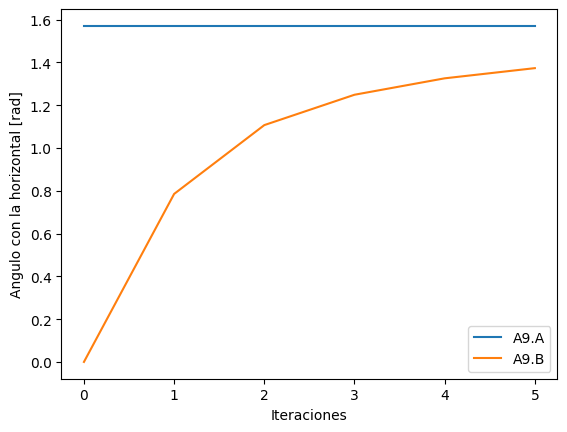

In [32]:
plt.plot(theta9A,label='A9.A')
plt.plot(theta9B,label='A9.B')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Angulo con la horizontal [rad]')


## Algoritmo Metodo de la potencia

Definimos 

$$
f(v) = \frac{Av}{||Av||_2}
$$

Entonces simplemente:

- Tomamos un $v$ cualquiera:
- Para $iter$ in $1,\dots,N$:

    - $w = f(v)$
    - Si $w^tv \sim 1$:
        - Stop
    - $v=w$

¿Qué falla en esta implementación?

- Tomamos un $v$ cualquiera:
- Para $iter$ in $1,\dots,N$:

    - $w = f(v)$
    - Si $|w^tv| \sim 1$:
        - Stop
    - $v=w$

¿Cómo recuperamos el autovalor?

$\lambda = w^t A w$ (recordar que $||w||_2=1$)